### 1. Importación



In [ ]:
# Importación de bibliotecas necesarias para el análisis
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Carga de datos

In [ ]:
# Se carga el cojunto de datos en un DataFrame de pandas
data_url = 'https://raw.githubusercontent.com/LeoSR02/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df_base1 = pd.read_json(data_url)


### 3. Exploración

In [ ]:
# Resumen de los datos
df_base1.head(10)
df_base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
# Revisar las columnas
print(df_base1.columns)

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [ ]:
# Tipos de datos
print(df_base1.dtypes)

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [ ]:
# Nulos
print(df_base1.isnull().sum())

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [ ]:
# Estructuras Anidadas
# Detectar columnas que contienen diccionarios en alguna fila
columnas_con_dict = [
    columna for columna in df_base1.columns
    if df_base1[columna].apply(lambda x: isinstance(x, dict)).any()
]

# Mostrar claves internas de cada columna con diccionarios
for columna in columnas_con_dict:
    print(f"\nColumna compuesta detectada: '{columna}'")
    print(f"Subcolumnas disponibles dentro de '{columna}':")

    # Obtener el primer valor no nulo que sea un diccionario
    primer_dict = next(
        (v for v in df_base1[columna] if isinstance(v, dict)), None
    )

    if primer_dict:
        for clave in primer_dict.keys():
            print(f"{columna}.{clave}")
    else:
        print("No se encontraron diccionarios válidos.")



Columna compuesta detectada: 'customer'
Subcolumnas disponibles dentro de 'customer':
customer.gender
customer.SeniorCitizen
customer.Partner
customer.Dependents
customer.tenure

Columna compuesta detectada: 'phone'
Subcolumnas disponibles dentro de 'phone':
phone.PhoneService
phone.MultipleLines

Columna compuesta detectada: 'internet'
Subcolumnas disponibles dentro de 'internet':
internet.InternetService
internet.OnlineSecurity
internet.OnlineBackup
internet.DeviceProtection
internet.TechSupport
internet.StreamingTV
internet.StreamingMovies

Columna compuesta detectada: 'account'
Subcolumnas disponibles dentro de 'account':
account.Contract
account.PaperlessBilling
account.PaymentMethod
account.Charges


### 4. Limpieza y Transformación


In [ ]:
# Creando una copia del Dataframe
df_final1 = df_base1.copy()


In [ ]:
# Expandir columnas con diccionarios
for columna in columnas_con_dict:
    # Expandir la columna que contiene diccionarios
    columnas_expandida = pd.json_normalize(
        df_final1[columna].dropna(),
        errors='ignore'
    )

    # Alinear los índices para que concuerden con el DataFrame original
    columnas_expandida.index = df_final1[columna].dropna().index

    # Añadir las columnas expandidas al DataFrame original
    df_final1 = pd.concat([df_final1, columnas_expandida], axis=1)

# Eliminar las columnas originales con dicts
df_final1.drop(columns=columnas_con_dict, inplace=True)

# Mostrar columnas finales
print("Columnas después de expandir:")
print(df_final1.columns)




Columnas después de expandir:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


In [ ]:
# Reemplazar puntos por guiones bajos en los nombres de columna
df_final1.columns = [col.replace('.', '_') for col in df_final1.columns]

In [ ]:
# Revisar estructura
df_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
# Revisar valores nulos
nulos = df_final1.isnull().sum()
print("Valores Nulos:\n", nulos)

Valores Nulos:
 customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
dtype: int64


In [ ]:
# Verificar tipos
print("🔎 Revisión de columnas tipo 'object' que podrían tener tipos incorrectos:\n")

for col in df_final1.columns:
    tipo = df_final1[col].dtype
    print(f"🟦 Columna: '{col}' - tipo detectado: {tipo}")

    if tipo == 'object':
        muestra = df_final1[col].dropna().unique()[:5]
        print(f"   ➤ Muestra de valores: {muestra}")

        # Verificar si puede convertirse a número
        try:
            df_final1[col].astype(float)
            print("   ⚠️ Posible número mal tipado como texto.")
        except:
            pass

    print()

🔎 Revisión de columnas tipo 'object' que podrían tener tipos incorrectos:

🟦 Columna: 'customerID' - tipo detectado: object
   ➤ Muestra de valores: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ']

🟦 Columna: 'Churn' - tipo detectado: object
   ➤ Muestra de valores: ['No' 'Yes' '']

🟦 Columna: 'gender' - tipo detectado: object
   ➤ Muestra de valores: ['Female' 'Male']

🟦 Columna: 'SeniorCitizen' - tipo detectado: int64

🟦 Columna: 'Partner' - tipo detectado: object
   ➤ Muestra de valores: ['Yes' 'No']

🟦 Columna: 'Dependents' - tipo detectado: object
   ➤ Muestra de valores: ['Yes' 'No']

🟦 Columna: 'tenure' - tipo detectado: int64

🟦 Columna: 'PhoneService' - tipo detectado: object
   ➤ Muestra de valores: ['Yes' 'No']

🟦 Columna: 'MultipleLines' - tipo detectado: object
   ➤ Muestra de valores: ['No' 'Yes' 'No phone service']

🟦 Columna: 'InternetService' - tipo detectado: object
   ➤ Muestra de valores: ['DSL' 'Fiber optic' 'No']

🟦 Columna: 'OnlineSecurity' - t

In [ ]:
# Limpiar y cambiar tipo de datos
# 1. Convertir Charges_Total a float
df_final1['Charges_Total'] = pd.to_numeric(df_final1['Charges_Total'], errors='coerce')

# 2. Convertir columnas de Yes/No a booleano
cols_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in cols_binarias:
    df_final1[col] = df_final1[col].map({'Yes': True, 'No': False}).astype('boolean')

# 3. Tratar valores especiales como 'No internet service'
cols_servicios = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Opcional: reemplazar valores para estandarizar
for col in cols_servicios:
    df_final1[col] = df_final1[col].replace({
        'No phone service': 'No',
        'No internet service': 'No'
    })

# 4. Reconvertir esas columnas a booleano si ahora solo tienen 'Yes' y 'No'
for col in cols_servicios:
    if df_final1[col].dropna().isin(['Yes', 'No']).all():
        df_final1[col] = df_final1[col].map({'Yes': True, 'No': False}).astype('boolean')

In [ ]:
# Verificar si hay valores vacíos/nulos en el dataframe Final
print("Dataframe Final:\n", df_final1[cols_binarias + cols_servicios].isna().sum())

# Verificar si hay valores vacíos/nulos ('') en la columna 'Churn' del dataframe Base
print("Dataframe Base:\n", (df_base1['Churn'] == '').sum())






Dataframe Final:
 Churn               224
Partner               0
Dependents            0
PhoneService          0
PaperlessBilling      0
MultipleLines         0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
dtype: int64
Dataframe Base:
 224


In [176]:
#Agregando Columna de Cuentas Diarias
df_final1['Cuentas_Diarias'] = (df_final1['Charges_Monthly'] / 30).round(2)
df_final1[['Charges_Monthly', 'Cuentas_Diarias']].head()


,Charges_Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


### 5. Análisis Exploratorio de Datos (EDA)

/tmp/ipython-input-1195267691.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Sí', 'NA'])


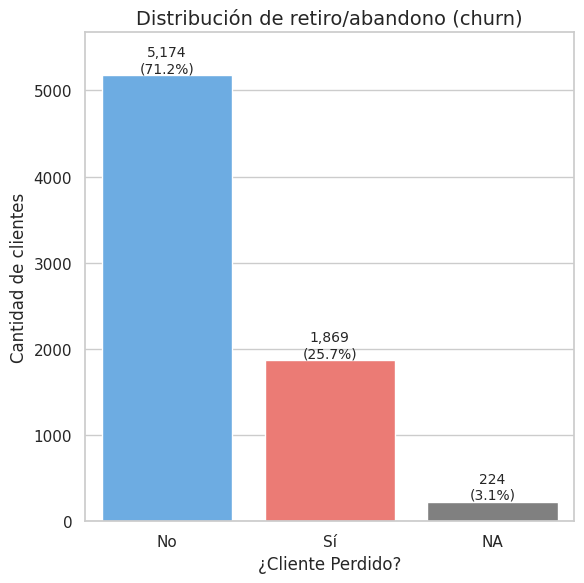

In [159]:
# Mostrando gráfico de barras: visualizar la distribución de clientes retirados

# Copiar el DataFrame original
df_plot = df_final1.copy()

# Reemplazar valores booleanos por texto ('Sí' y 'No')
df_plot['Churn'] = df_plot['Churn'].map({True: 'Sí', False: 'No'})

# Reemplazar valores nulos por 'NA'
df_plot['Churn'] = df_plot['Churn'].fillna('NA')

# Configurar estilo
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(6, 6))

# Gráfico de barras
ax = sns.countplot(
    data=df_plot,
    x='Churn',
    hue='Churn',
    dodge=False,
    legend=False,
    palette={'Sí': '#ff6961', 'No': '#59adf6', 'NA': 'gray'}
)

# Etiquetas y título
ax.set_title('Distribución de retiro/abandono (churn)', fontsize=14)
ax.set_xlabel('¿Cliente Perdido?', fontsize=12)
ax.set_ylabel('Cantidad de clientes', fontsize=12)

# Asegurar orden de las etiquetas si lo deseas (opcional)
ax.set_xticklabels(['No', 'Sí', 'NA'])

# Ajustar altura del eje Y si deseas
max_y = df_plot['Churn'].value_counts().max()
ax.set_ylim(0, max_y + 500)

# Total general para calcular porcentajes
total = len(df_plot)

# Agregar etiquetas de cantidad + porcentaje
for p in ax.patches:
    height = p.get_height()
    porcentaje = (height / total) * 100
    ax.annotate(f'{height:,.0f}\n({porcentaje:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)


# Ajustar márgenes
plt.tight_layout()

# Mostrar gráfico
plt.show()




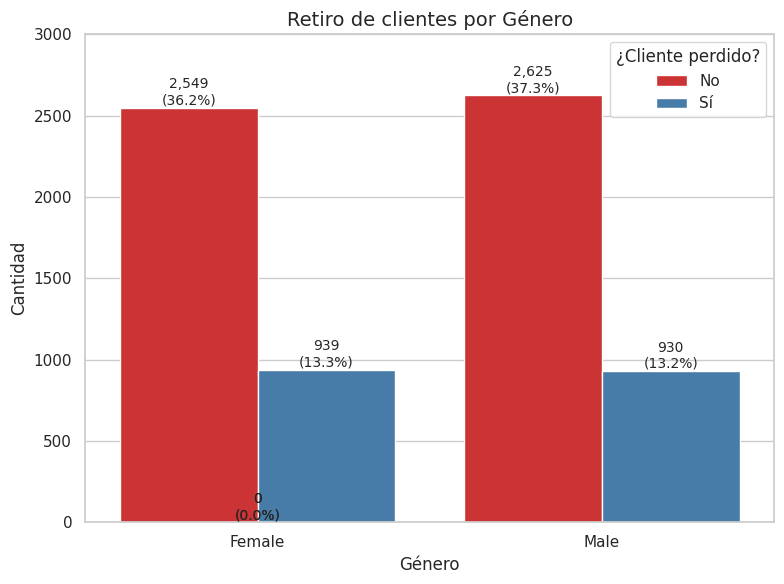

In [160]:
# Retiro de Clientes por Género
# Crear figura
# Mapeo de etiquetas
df_final1['Churn_Label'] = df_final1['Churn'].map({0: 'No', 1: 'Sí'})

# Crear figura
plt.figure(figsize=(8, 6))

# Gráfico
ax = sns.countplot(
    data=df_final1,
    x='gender',
    hue='Churn_Label',
    palette='Set1'
)

# Título y etiquetas
ax.set_title('Retiro de clientes por Género', fontsize=14)
ax.set_xlabel('Género', fontsize=12)
ax.set_ylabel('Cantidad', fontsize=12)
ax.legend(title='¿Cliente perdido?')

# Limitar eje Y
plt.ylim(0, 3000)

# Calcular total general (para porcentaje respecto al total de registros)
total = len(df_final1[df_final1['Churn_Label'].isin(['Sí', 'No'])])

# Agregar etiquetas sobre las barras
for p in ax.patches:
    height = p.get_height()
    porcentaje = (height / total) * 100 if total > 0 else 0
    ax.annotate(f'{height:,.0f}\n({porcentaje:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

# Mostrar gráfico
plt.tight_layout()
plt.show()


['1 año' 'Mensual' '2 años']


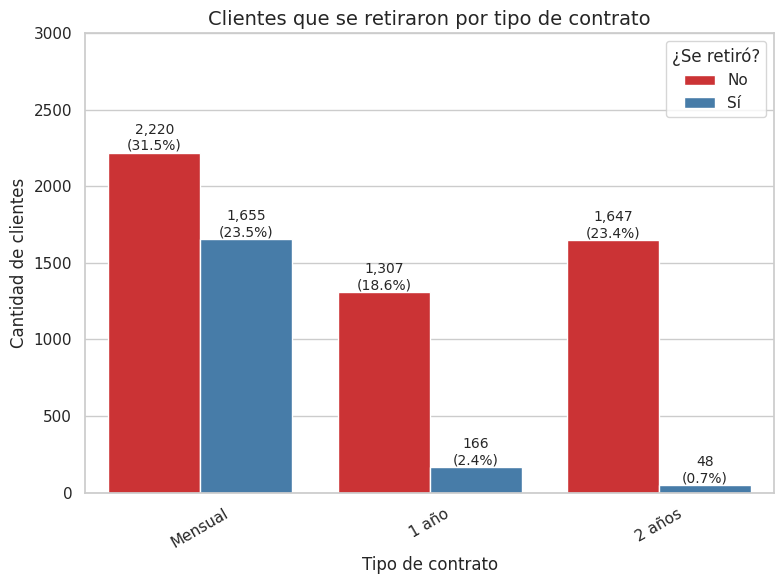

In [161]:
# Retiro de Clientes por tipo de contrato

# Mostrar valores únicos
print(df_final1['Contract'].unique())

# Reemplazar nombres de contrato
df_final1['Contract'] = df_final1['Contract'].replace({
    'Month-to-month': 'Mensual',
    'One year': '1 año',
    'Two year': '2 años'
})

# Filtrar datos válidos para evitar errores con pd.NA
df_plot = df_final1[df_final1['Churn'].isin([0, 1])].copy()

# Orden deseado
orden_contratos = ['Mensual', '1 año', '2 años']

# Crear figura
plt.figure(figsize=(8, 6))

# Gráfico de barras
ax = sns.countplot(
    data=df_plot,
    x='Contract',
    hue='Churn',
    palette='Set1',
    order=orden_contratos
)

# Título y etiquetas
plt.title('Clientes que se retiraron por tipo de contrato', fontsize=14)
plt.xlabel('Tipo de contrato', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.xticks(rotation=30)

# Leyenda
plt.legend(
    title='¿Se retiró?',
    labels=['No', 'Sí']
)

# Total general para el cálculo de porcentajes
total = len(df_plot)

# Agregar etiquetas (cantidad + porcentaje)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if pd.notna(height) and height > 0:
            porcentaje = (height / total) * 100
            ax.annotate(f'{height:,.0f}\n({porcentaje:.1f}%)',
                        (bar.get_x() + bar.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)

# Ajuste final
plt.ylim(0, 3000)
plt.tight_layout()
plt.show()



['Cheque por correo' 'Cheque electrónico'
 'Tarjeta de crédito (automático)' 'Transferencia bancaria (automático)']


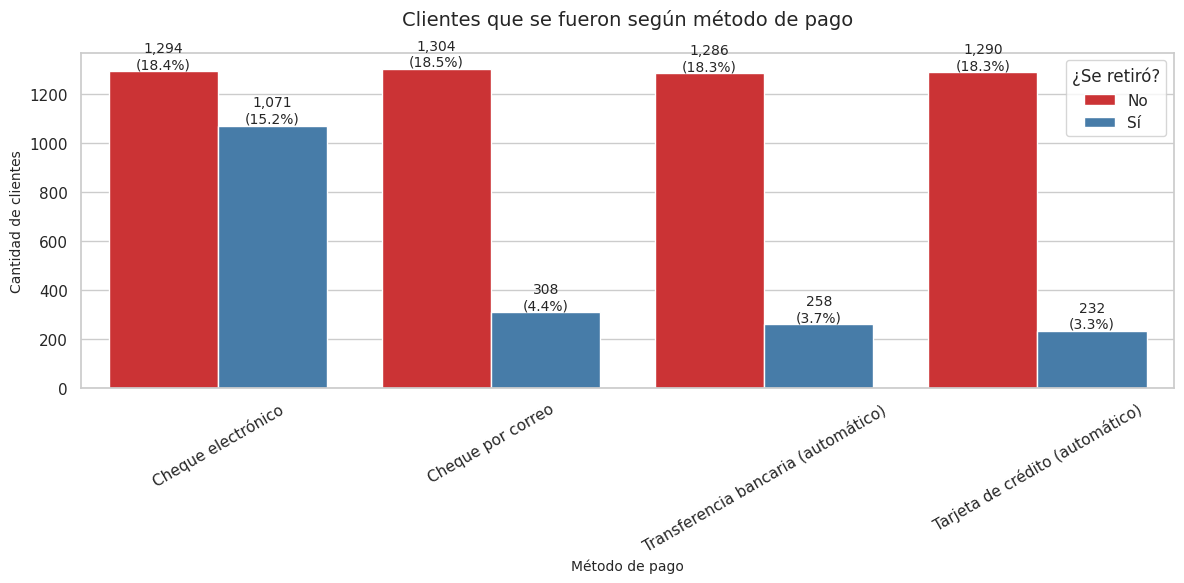

In [158]:
# Retiro de Clientes por Método de Pago

# Revisión previa
print(df_final1['PaymentMethod'].unique())

# Reemplazo de nombres a español
df_final1['PaymentMethod'] = df_final1['PaymentMethod'].replace({
    'Mailed check': 'Cheque por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automático)'
})

# Orden deseado de métodos
orden_metodos = [
    'Cheque electrónico',
    'Cheque por correo',
    'Transferencia bancaria (automático)',
    'Tarjeta de crédito (automático)'
]

# Filtrar solo registros con Churn válido
df_plot = df_final1[df_final1['Churn'].isin([0, 1])].copy()

# Crear gráfico
plt.figure(figsize=(12, 6))

ax = sns.countplot(
    data=df_plot,
    x='PaymentMethod',
    hue='Churn',
    palette='Set1',
    order=orden_metodos
)

# Título y ejes
plt.title('Clientes que se retiraron según método de pago', fontsize=14, pad=20)
plt.xlabel('Método de pago', fontsize=10)
plt.ylabel('Cantidad de clientes', fontsize=10)
plt.xticks(rotation=30)

# Leyenda personalizada
plt.legend(
    title='¿Se retiró?',
    labels=['No', 'Sí']
)

# Total para calcular % sobre el total general
total = len(df_plot)

# Etiquetas de cantidad + porcentaje por barra
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if pd.notna(height) and height > 0:
            porcentaje = (height / total) * 100
            ax.annotate(f'{height:,.0f}\n({porcentaje:.1f}%)',
                        (bar.get_x() + bar.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


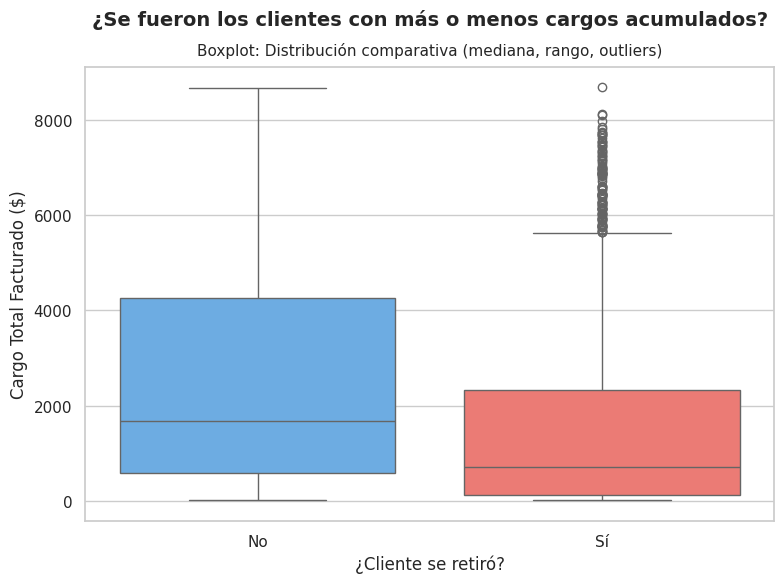

In [174]:
# Retiro de Clientes según Total Facturado

# Crear copia segura del dataframe
df_plot = df_final1.copy()

# Convertir de tipo 'boolean' (nullable) a bool nativo
df_plot = df_plot[df_plot['Churn'].notna()]  # quitar NA
df_plot['Churn'] = df_plot['Churn'].astype(bool)

# Crear gráfico boxplot
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=df_plot,
    x='Churn',
    y='Charges_Total',
    hue='Churn',
    palette={False: '#59adf6', True: '#ff6961'},
    dodge=False,
    legend=False
)

# Título
plt.title('¿Se fueron los clientes con más o menos cargos acumulados?', fontsize=14, weight='bold', pad=30)

# Subtítulo
plt.text(0.5, 1.02,
         'Boxplot: Distribución comparativa (mediana, rango, outliers)',
         fontsize=11,
         ha='center',
         va='bottom',
         transform=plt.gca().transAxes)

plt.xlabel('¿Cliente se retiró?', fontsize=12)
plt.ylabel('Cargo Total Facturado ($)', fontsize=12)
plt.xticks([0, 1], ['No', 'Sí'])

plt.tight_layout()
plt.show()




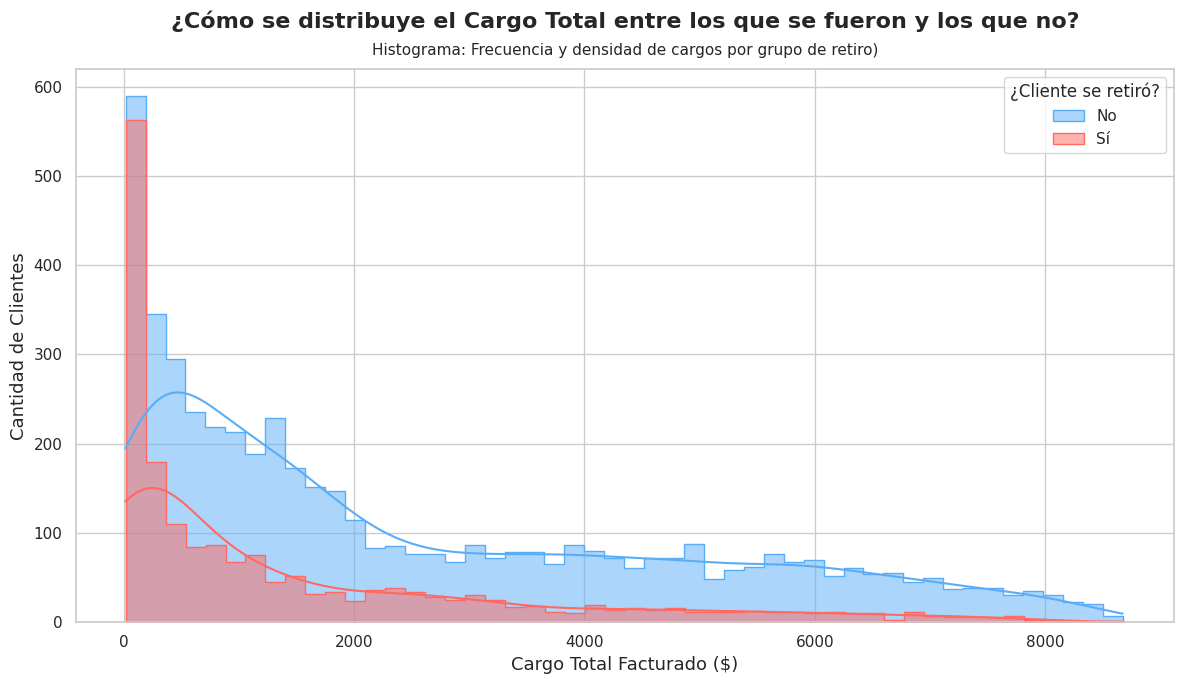

In [175]:
# Distribución de Frecuencias del Cargo Total por Estado del Cliente
# Excluir valores NA en Charges_Total
df_plot = df_final1[df_final1['Charges_Total'].notna()]

# Definir colores personalizados
color_no = '#59adf6'    # Azul para clientes que NO se fueron
color_si = '#ff6961'    # Rojo para clientes que SÍ se fueron

# Crear figura
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Gráfico por grupo (churn 0 o 1)
for churn_value, color, label in zip([False, True], [color_no, color_si], ['No', 'Sí']):
    subset = df_plot[df_plot['Churn'] == churn_value]

    sns.histplot(
        data=subset,
        x='Charges_Total',
        kde=True,
        bins=50,
        color=color,
        label=label,
        element='step',
        fill=True,
        alpha=0.5,
        stat='count'
    )

# Título y etiquetas
plt.title('¿Cómo se distribuye el Cargo Total entre los que se fueron y los que no?', fontsize=16, weight='bold', pad=30)
plt.xlabel('Cargo Total Facturado ($)', fontsize=13)
plt.ylabel('Cantidad de Clientes', fontsize=13)

# Subtítulo
plt.text(0.5, 1.02,
         'Histograma: Frecuencia y densidad de cargos por grupo de retiro)',
         fontsize=11,
         ha='center',
         va='bottom',
         transform=plt.gca().transAxes)

# Leyenda
plt.legend(title='¿Cliente se retiró?', loc='upper right')

# Ajustar márgenes
plt.tight_layout()

# Mostrar gráfico
plt.show()
